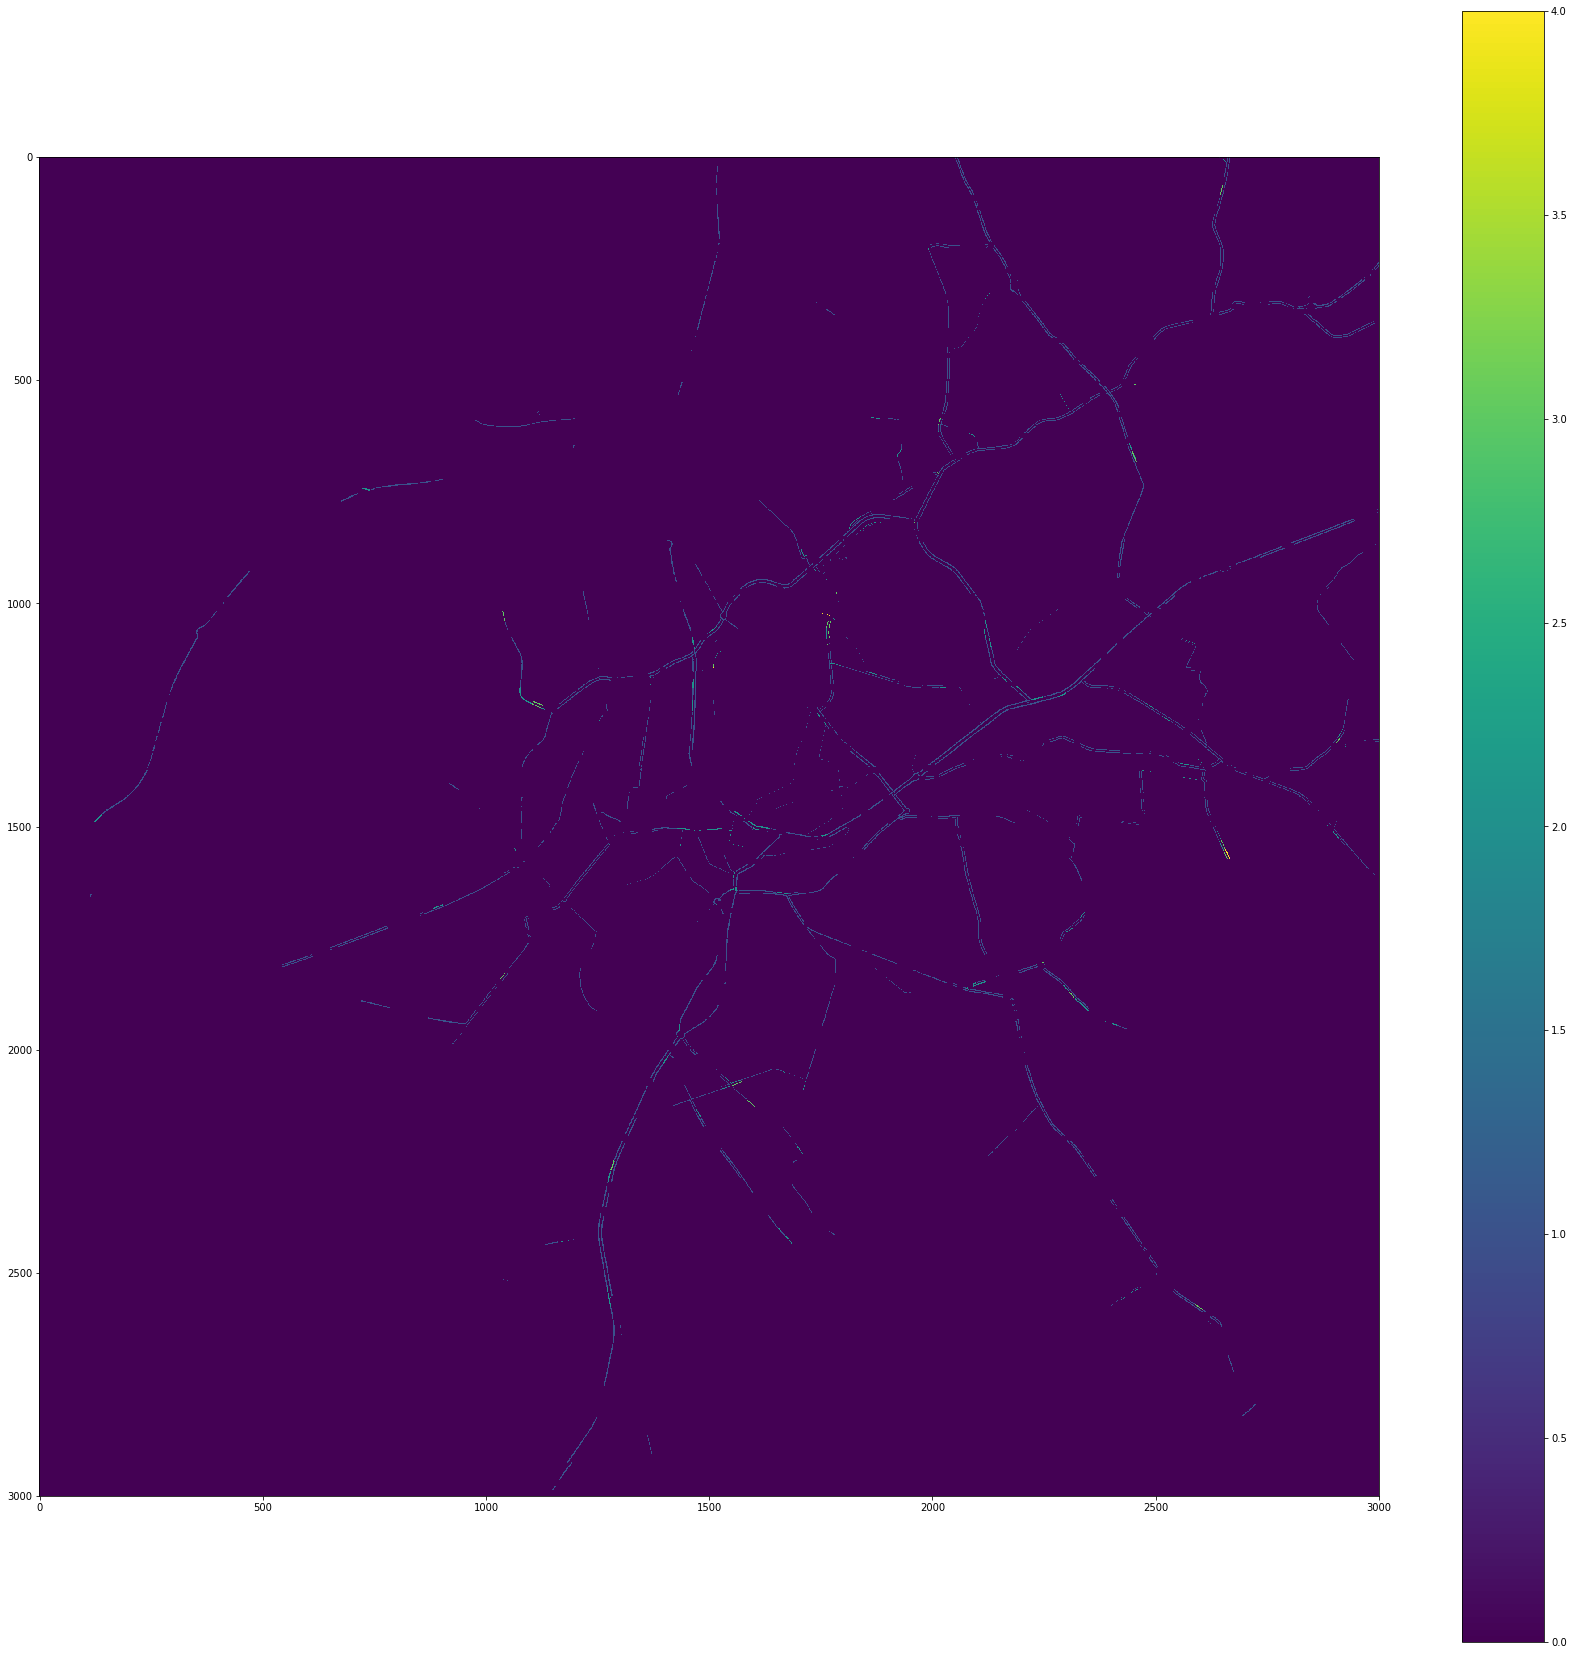

In [1]:
import glob, os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np
image_arr = []
# for img in glob.glob("*.png"):
#     im = Image.open(img)
#     print(im)

im1 = Image.open('map022819_235756.png')
im2 = Image.open('map022819_231244.png')

im1=np.array(im1)
im2=np.array(im2)

imchanged = ~np.all(im1==im2,axis=2)

tests = np.array([[129,31,31],[242,60,50],[255,151,77],[99,214,104]])
keeps = []
for test in tests:
    keep = np.full([im1.shape[0],im1.shape[1]],True)
    for i in range(3):
        keep &= (im1[:,:,i]==test[i])
    keeps.append(keep)
    
plotkeeps = keeps[0]*4+keeps[1]*3+keeps[2]*2+keeps[3]*1

#Plot
plt.figure(figsize=[30,30])
plt.imshow(plotkeeps)#[1000:2000,1000:2000])#imchanged[1000:2000,1000:2000])
plt.colorbar()

#Downscale image
done = np.zeros([500,500])
for i,x in enumerate(range(0,5000,10)):
    for j,y in enumerate(range(0,5000,10)):
        done[i,j] = np.any(keeps[2][x:(x+10),y:(y+10)])


In [ ]:
# import the necessary packages
import numpy as np
import argparse
import cv2
# load the image
image = cv2.imread("map022819_235756.png")
# define the list of boundaries
boundaries = [([31,31,129], [50,60,242]), ([79,151,255], [77,151,255])]
# loop over the boundaries
for (lower, upper) in boundaries:
# create NumPy arrays from the boundaries
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
# find the colors within the specified boundaries and apply the mask
    mask = cv2.inRange(image, lower, upper) 
    output = cv2.bitwise_and(image, image, mask = mask)
# show the images
    cv2.imshow("map022819_235756.png", np.hstack([image, output]))
    cv2.waitKey(0)